## Kaggle - Predict Future Sales
### Data Exploration & Visualization

In [4]:
import pandas as pd
import numpy as np
import sys
from matplotlib import pyplot as plt

stdout = sys.stdout

#sales_train = pd.read_csv("/Users/djmore/Udacity/machine-learning/projects/capstone/sales_train.csv", sep =',', skiprows=[1,220000], nrows = 100000)

sales_train     = pd.read_csv("/Users/djmore/Udacity/machine-learning/projects/capstone/sales_train.csv", sep =',')
items           = pd.read_csv('/Users/djmore/Udacity/machine-learning/projects/capstone/items.csv')
item_categories = pd.read_csv('/Users/djmore/Udacity/machine-learning/projects/capstone/item_categories.csv')
shops           = pd.read_csv('/Users/djmore/Udacity/machine-learning/projects/capstone/shops.csv')
test            = pd.read_csv('/Users/djmore/Udacity/machine-learning/projects/capstone/test.csv')

sales_data           = pd.DataFrame(sales_train)
items_data           = pd.DataFrame(items)
item_categories_data = pd.DataFrame(item_categories)
shops_data           = pd.DataFrame(shops)
kaggle_data          = pd.DataFrame(test)

# Inspect data
sales_data.head(5)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


### Check if there are blank rows or null values in any data elements

In [47]:
display(sales_data.isnull().any())
#display(sales_data.groupby(['shop_id','item_id']).nunique().count())
#display(sales_data.groupby(['shop_id','item_id'])['item_price'].nunique().count())
#display(kaggle_data.groupby(['shop_id','item_id']).nunique().count())

date                    False
date_block_num          False
shop_id                 False
item_id                 False
item_price              False
item_cnt_day            False
sale_revenue_per_day    False
year                    False
month                   False
day                     False
dayofyear               False
weekofyear              False
dayofweek               False
quarter                 False
dtype: bool

In [ ]:
### Import kaggle test data

In [8]:
#kaggle_data[~kaggle_data['shop_id','item_id'].isin(sales_data)].dropna()
#print('Total number of rows in kaggle test dataset : {}'.format(kaggle_data.count()))
kaggle_data[~kaggle_data[['shop_id','item_id']].isin(sales_data[['shop_id','item_id']])].count()
#print('Total number of rows in kaggle test dataset : {}'.format(kaggle_data.count()))

ID              0
shop_id    212779
item_id    214191
dtype: int64

In [6]:
kaggle_data.count()

ID         214200
shop_id    214200
item_id    214200
dtype: int64

## Describe data, gather basic stats

In [13]:
print('Shops               - {}'.format(shops_data['shop_id'].count()))
print('Item Categories     - {}'.format(item_categories_data['item_category_id'].count()))
print('Items               - {}'.format(items_data['item_id'].count()))
print('Median item price   - {}'.format(sales_data['item_price'].median()))
print('Min item price      - {}'.format(sales_data['item_price'].min()))
print('Max item price      - {}'.format(sales_data['item_price'].max()))
print('Daily sales data len- {}'.format(sales_data['shop_id'].count()))
print('')

Shops               - 60
Item Categories     - 84
Items               - 22170
Median item price   - 399.0
Min item price      - -1.0
Max item price      - 307980.0
Daily sales data len- 2935849



### Russian to English translation of item names and item categories

In [49]:
from googletrans import Translator

In [58]:
### Russian to English Translation
from googletrans import Translator

translator = Translator()
item_categories_data['english_category_name']=None
i=0
for row in item_categories_data['item_category_name']:
    english_category_name = translator.translate(row)
    item_categories_data['english_category_name'][i]=english_category_name.text
    i+=1
    
items_data['english_item_name']=None
i=0
for row in items_data['item_name']:
    english_item_name = translator.translate(row)
    items_data['english_item_name'][i]=english_item_name.text
    i+=1

/Users/djmore/anaconda3/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/djmore/anaconda3/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


JSONDecodeError: Expecting value: line 1 column 1 (char 0)

## Negative item counts may indicate either returns or buy one get one promo.
## Analyze which item_category and item_names have negative item counts

In [14]:
print('Negative Item Count = {}'.format((sales_data[sales_data['item_cnt_day'] < 0])['item_cnt_day'].count()))
print('Negative Item Price = {}'.format((sales_data[sales_data['item_price'] < 0])['item_price'].count()))

Negative Item Count = 7356
Negative Item Price = 1


# Data Exploration & Visualization.

In [34]:
#### Questions to probe sales data

#1  - Which shop sells most number of items?
#2  - Which item sells most?
#3  - Which item generates most revenue?
#3  - Which item is in demand and when?
#4  - Which weekday generates most sales?
#5  - Which day of the month generates most sales?
#6  - Which month of the year generates most sales?
#7  - Which week of the year generates most sales?
#8  - Which day of the year generates most sales?
#9  - Which quarter generates most sales?
#10 - Plot sales histogram for each product category.
#11 - How sales behaved through the years
#12 - How do monthly revenue looks like?
#13 - Total revenue over the years for each item category
#14 - What are some of the top item categories in terms of sales?
#15 - How has item price change over the years?
#16 - What is mean and median price of items and within item-category?
#17 - How have sales behaved over the last 34 months? RevenueByMonth plot
#18 - Which items have generated the most revenue?
#19 - Which item categorie have generated the most revenue?
#20 - Average sales revenue per shop
#21 - Which shops contributed most to the revenue?

### First let's compute the total sales per month and plot that data.

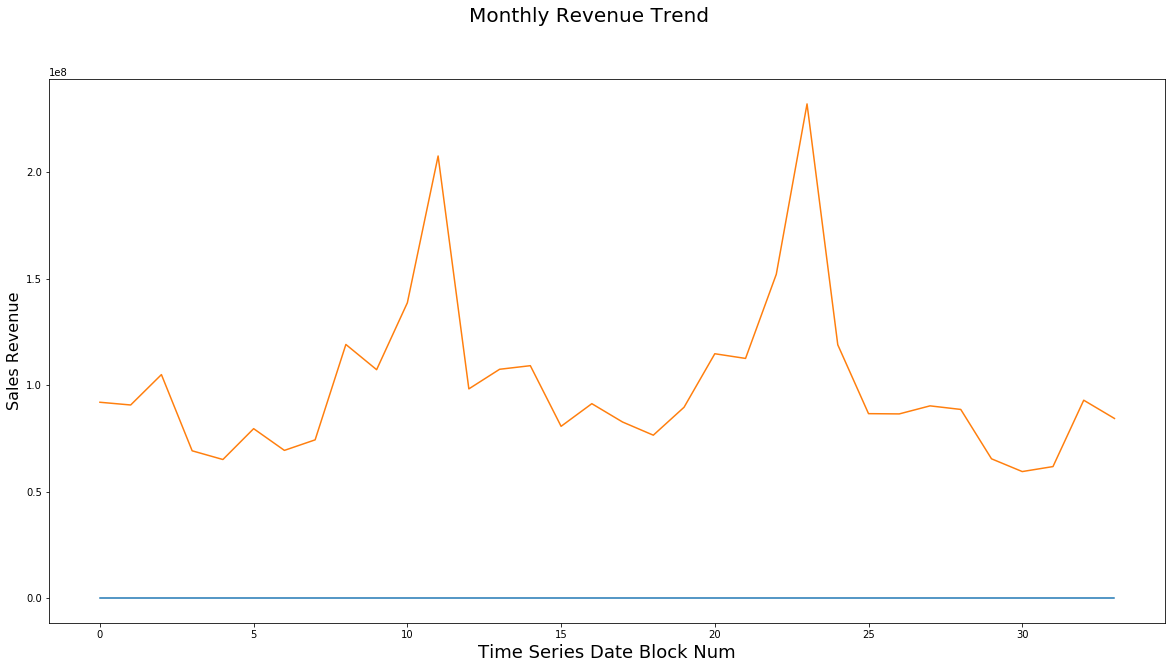

In [22]:
# Create additional dataframe to easy plotting for trend and pattern analysis and pattern 

sales_data['sale_revenue_per_day'] = sales_data['item_price'] * sales_data['item_cnt_day']
Revenue = pd.DataFrame({'Monthly Revenue' : sales_data.groupby(['date_block_num'])['sale_revenue_per_day'].sum()}).reset_index()

fig = plt.figure(figsize=(20,10))
fig.suptitle('Monthly Revenue Trend', fontsize=20)
plt.xlabel('Time Series Date Block Num', fontsize=18)
plt.ylabel('Sales Revenue', fontsize=16)
plt.plot(Revenue)
fig.savefig('revenue.jpg')

/Users/djmore/anaconda3/envs/py3/lib/python3.6/site-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


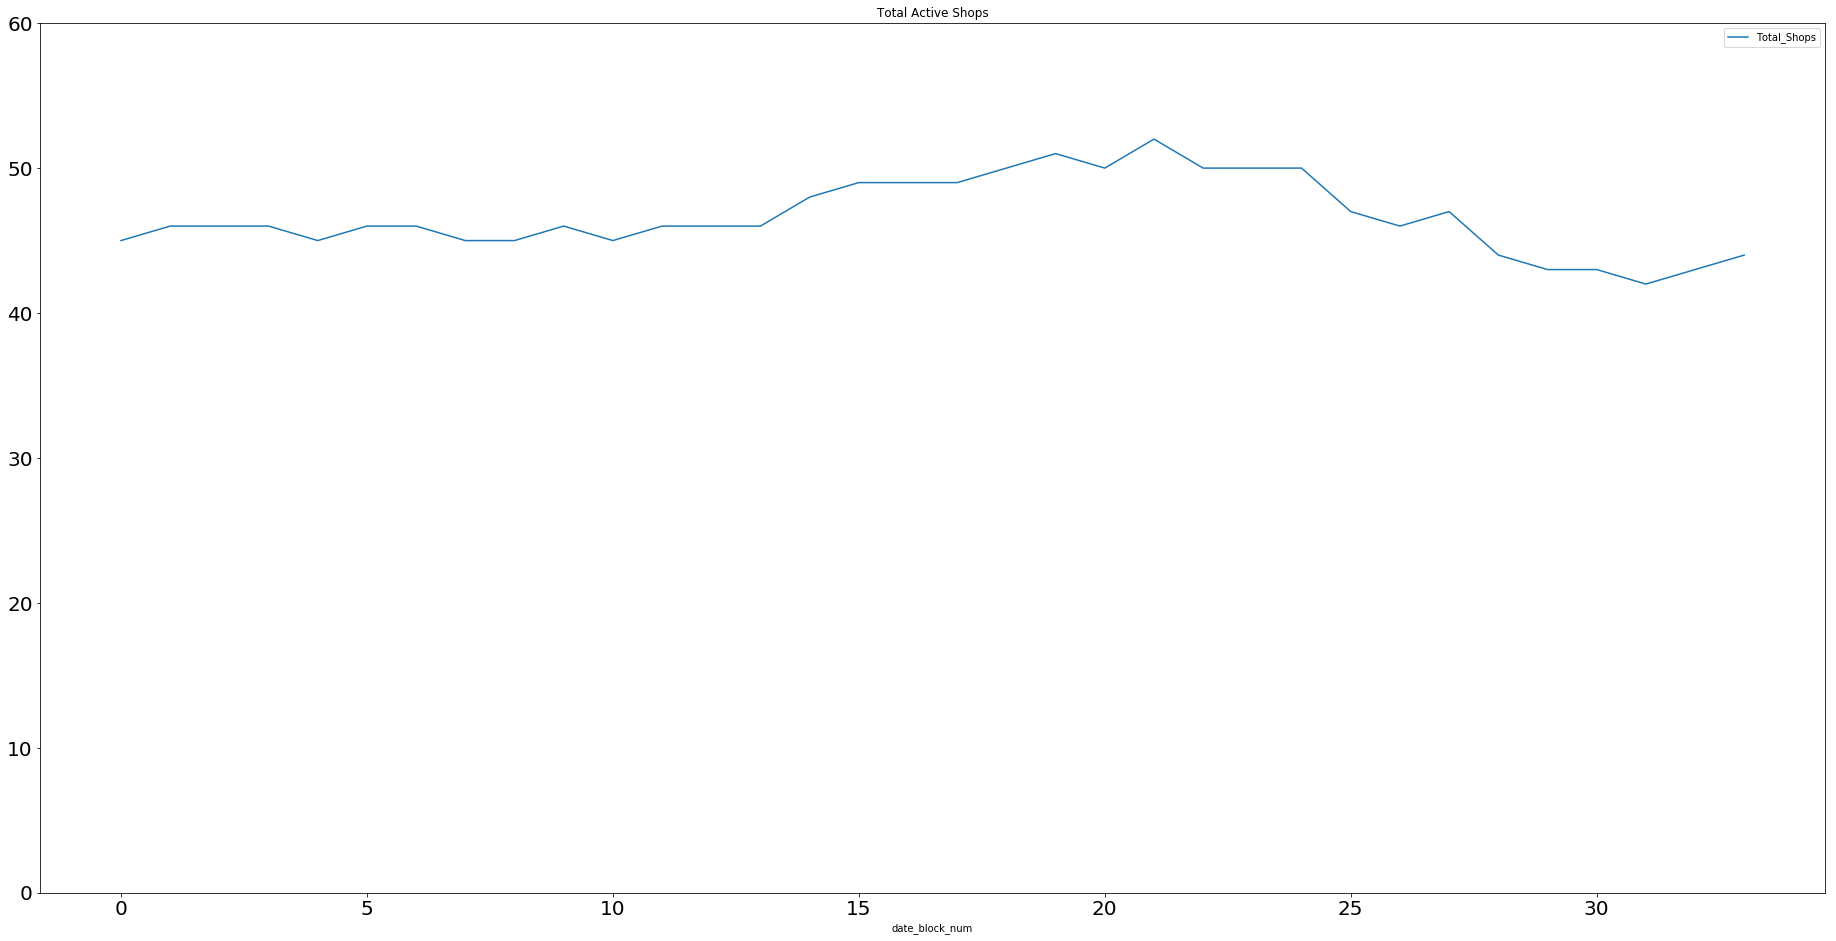

In [23]:
Shops   = pd.DataFrame({'Total_Shops' : sales_data.groupby(['date_block_num'])['shop_id'].nunique()}).reset_index()
Shops.plot(x="date_block_num", y=['Total_Shops'], kind="line", title="Total Active Shops", figsize=(32,16), fontsize=20, ylim=(0,60))

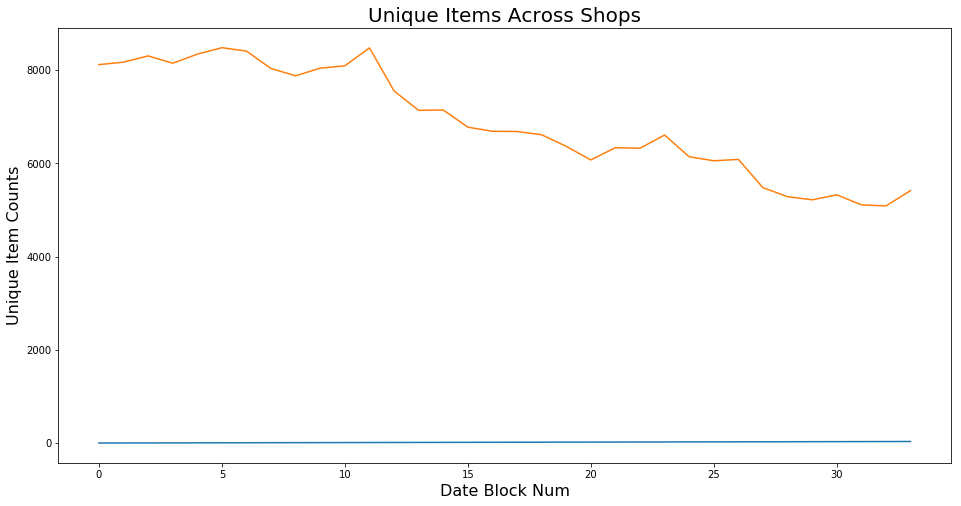

In [24]:
Items   = pd.DataFrame({'Unique Items Sold' : sales_data.groupby(['date_block_num'])['item_id'].nunique()}).reset_index()

plt.figure(figsize=(16,8))
plt.title('Unique Items Across Shops',fontsize=20)
plt.xlabel('Date Block Num',fontsize=16)
plt.ylabel('Unique Item Counts',fontsize=16)
plt.plot(Items);
fig.savefig('items.jpg')

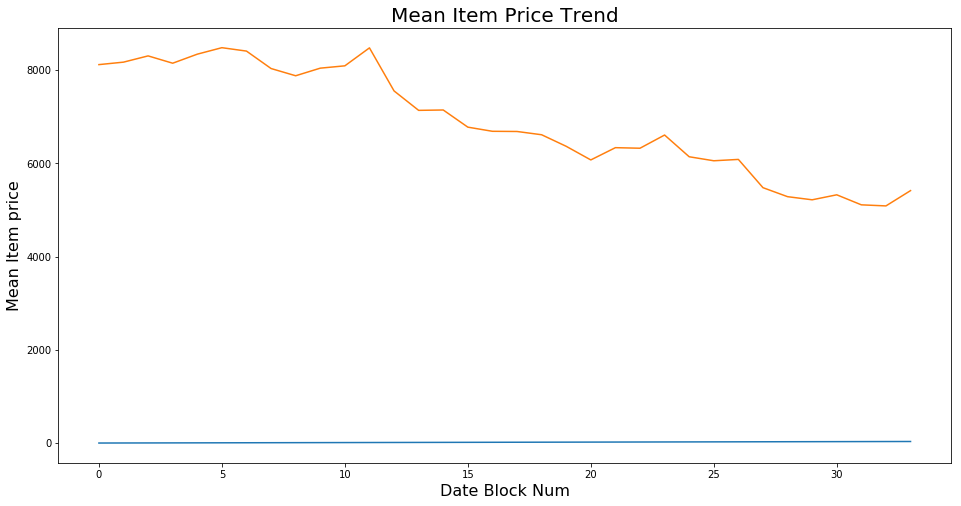

In [25]:
Item_Price = pd.DataFrame({'Mean Item Price' : sales_data.groupby(['date_block_num'])['item_price'].mean()}).reset_index()

plt.figure(figsize=(16,8))
plt.title('Mean Item Price Trend',fontsize=20)
plt.xlabel('Date Block Num',fontsize=16)
plt.ylabel('Mean Item price',fontsize=16)
plt.plot(Items);
fig.savefig('item_price.jpg')

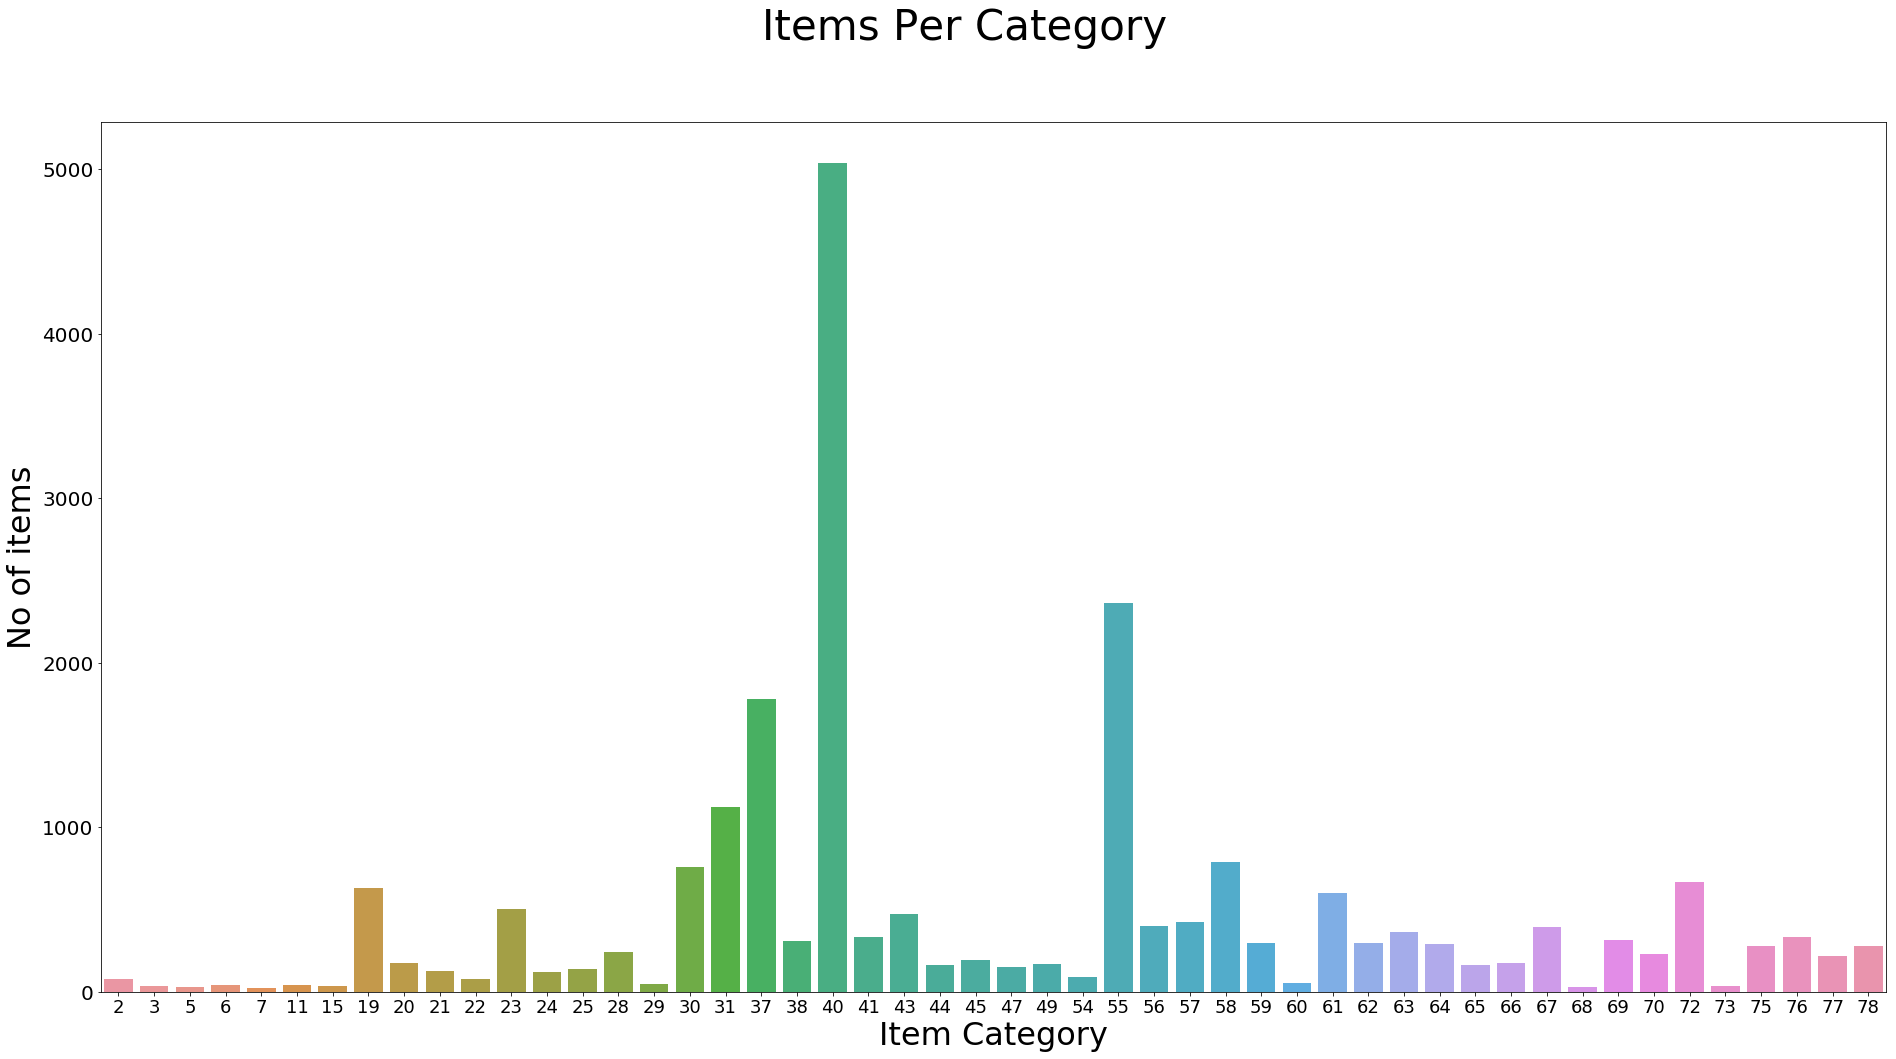

In [33]:
import seaborn as sns

# No. of items per category 
x=items_data.groupby(['item_category_id']).count()
x=x.sort_values(by='item_id',ascending=False)
x=x.iloc[0:50].reset_index()
#x

# plot
fig = plt.figure(figsize=(32,16))
ax = sns.barplot(x.item_category_id, x.item_id)
fig.suptitle('Items Per Category', fontsize=42)
plt.ylabel('No of items', fontsize=32)
plt.xlabel('Item Category', fontsize=32)
plt.xticks(fontsize=18)
plt.yticks(fontsize=20)
fig.savefig('items_per_category.jpg')
plt.show()

### Total sales based on net total items sold

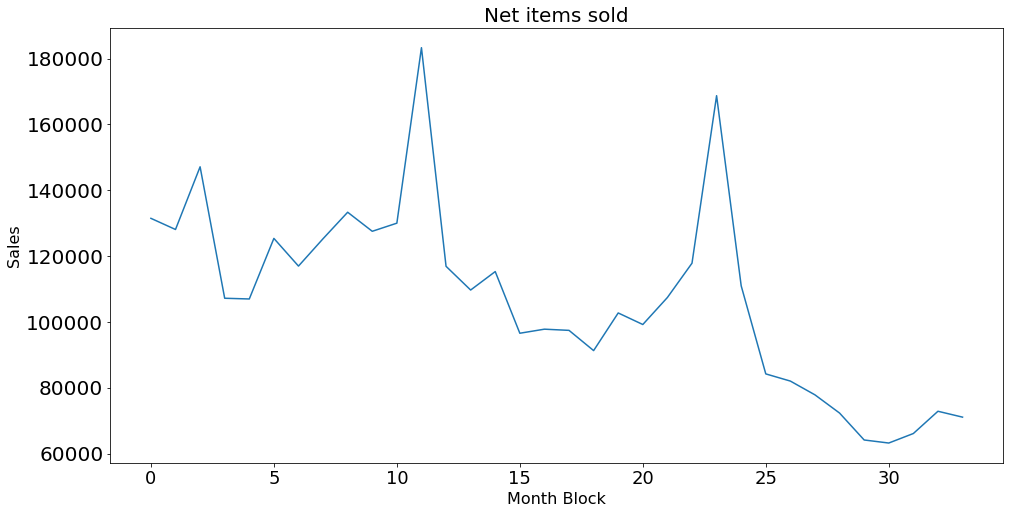

In [37]:
# Total sales based on net total items sold
from matplotlib import pyplot as plt
net_items_sold=sales_data.groupby(["date_block_num"])["item_cnt_day"].sum()
net_items_sold.astype('float')
plt.figure(figsize=(16,8))
plt.title('Net items sold',fontsize=20)
plt.xlabel('Month Block',fontsize=16)
plt.ylabel('Sales',fontsize=16)
plt.xticks(fontsize=18)
plt.yticks(fontsize=20)
plt.plot(net_items_sold);
fig.savefig('net_items_sold.jpg')

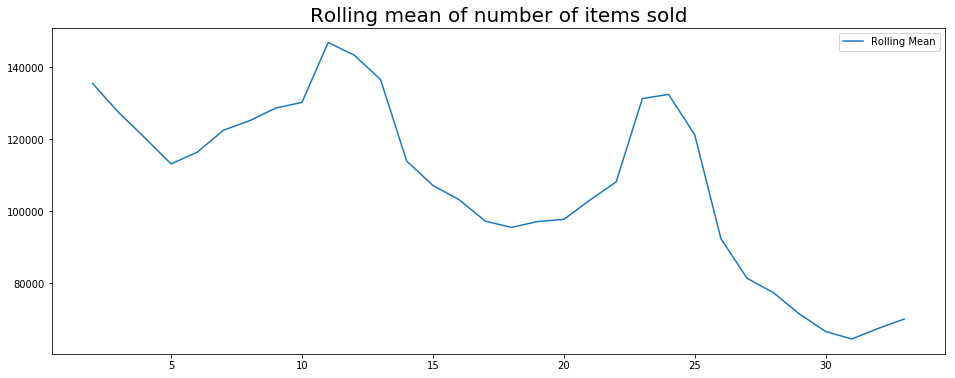

In [38]:
plt.figure(figsize=(16,6))
plt.title('Rolling mean of number of items sold',fontsize=20)
plt.plot(net_items_sold.rolling(window=3,center=False).mean(),label='Rolling Mean')
plt.legend()

In [ ]:
## Trend and Seasonality analysis with StatsModel

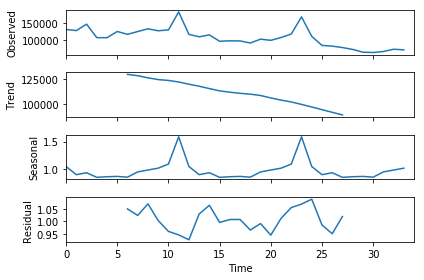

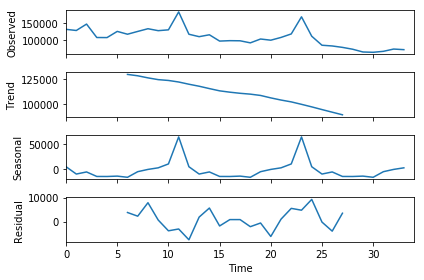

In [41]:
#Source - https://newonlinecourses.science.psu.edu/stat510/node/69/

#The following two structures are considered for basic decomposition models:
#1. Additive:  xt = Trend + Seasonal + Random
#2. Multiplicative:  xt = Trend * Seasonal * Random

import statsmodels.api as sm

# multiplicative
res = sm.tsa.seasonal_decompose(net_items_sold.values,freq=12,model="multiplicative")
fig = res.plot()

import statsmodels.api as sm
# Additive model
res = sm.tsa.seasonal_decompose(net_items_sold.values,freq=12,model="additive")
fig = res.plot()

### Break down date column into individual features
### Year, Month, Day, DayofYear, WeekOfYear, DayOfWeek, Quarter
### This will help us capture weekly, monthly, quarterly and yearly seasonality in the sales data

In [43]:
# Convert date field to datetime field in pandas
sales_data['date'] = pd.to_datetime(sales_data['date'])

# Extract out date features and add it to sales_data DataFrame
sales_data['year'] = sales_data['date'].dt.year
sales_data['month'] = sales_data['date'].dt.month
sales_data['day'] = sales_data['date'].dt.day

sales_data['dayofyear'] = sales_data['date'].dt.dayofyear
sales_data['weekofyear'] = sales_data['date'].dt.weekofyear
sales_data['dayofweek'] = sales_data['date'].dt.dayofweek
sales_data['quarter'] = sales_data['date'].dt.quarter

# Sort data in ascending order of time series - year, month,and day
sales_data.sort_values(['date_block_num','date'], ascending=[True,True],inplace=True)
sales_data.tail(5)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,sale_revenue_per_day,year,month,day,dayofyear,weekofyear,dayofweek,quarter
2935638,2015-12-10,33,25,7724,1899.0,1.0,1899.0,2015,12,10,344,50,3,4
2935648,2015-12-10,33,25,7894,2290.0,1.0,2290.0,2015,12,10,344,50,3,4
2935659,2015-12-10,33,25,7657,349.0,2.0,698.0,2015,12,10,344,50,3,4
2935679,2015-12-10,33,25,7842,1599.0,1.0,1599.0,2015,12,10,344,50,3,4
2935770,2015-12-10,33,25,7071,999.0,2.0,1998.0,2015,12,10,344,50,3,4


/Users/djmore/anaconda3/envs/py3/lib/python3.6/site-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


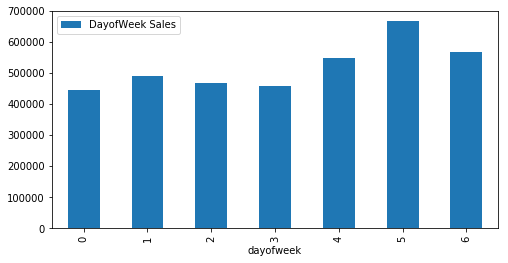

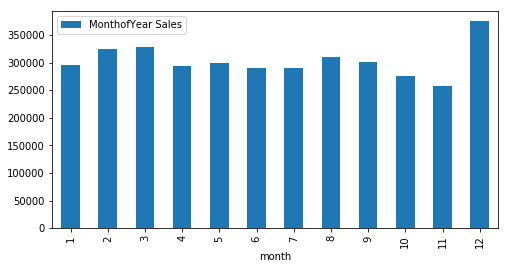

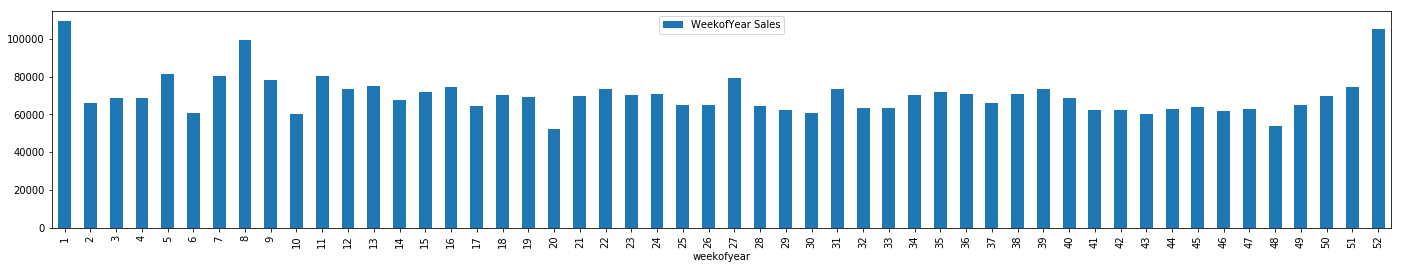

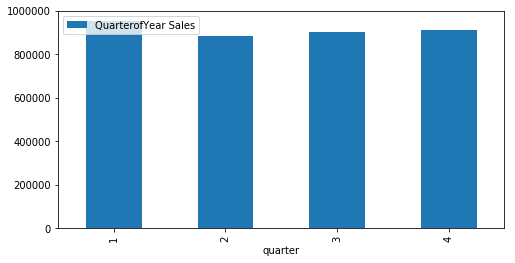

In [46]:
# Week Day and Monthly seasonality

DayofWeek     = pd.DataFrame({'DayofWeek Sales' : sales_data.groupby(['dayofweek'])['item_cnt_day'].sum()}).reset_index()
DayofWeek.plot(x="dayofweek", y=['DayofWeek Sales'], kind="bar", figsize=(8,4))

MonthofYear     = pd.DataFrame({'MonthofYear Sales' : sales_data.groupby(['month'])['item_cnt_day'].sum()}).reset_index()
MonthofYear.plot(x="month", y=['MonthofYear Sales'], kind="bar", figsize=(8,4))

WeekofYear     = pd.DataFrame({'WeekofYear Sales' : sales_data.groupby(['weekofyear'])['item_cnt_day'].sum()}).reset_index()
WeekofYear.plot(x="weekofyear", y=['WeekofYear Sales'], kind="bar", figsize=(24,4))

QuarterofYear     = pd.DataFrame({'QuarterofYear Sales' : sales_data.groupby(['quarter'])['item_cnt_day'].sum()}).reset_index()
QuarterofYear.plot(x="quarter", y=['QuarterofYear Sales'], kind="bar", figsize=(8,4))

## Let's check which items are popular at which stores using a heat map across shops and item_categories.

In [52]:
sales_items = pd.merge(sales_data, items_data[['item_id','item_name','english_item_name','item_category_id']], how='inner', on='item_id')
sales_results = pd.merge(sales_items, 
                         item_categories_data[['item_category_name','item_category_id','english_category_name']], 
                        how='inner',on='item_category_id')

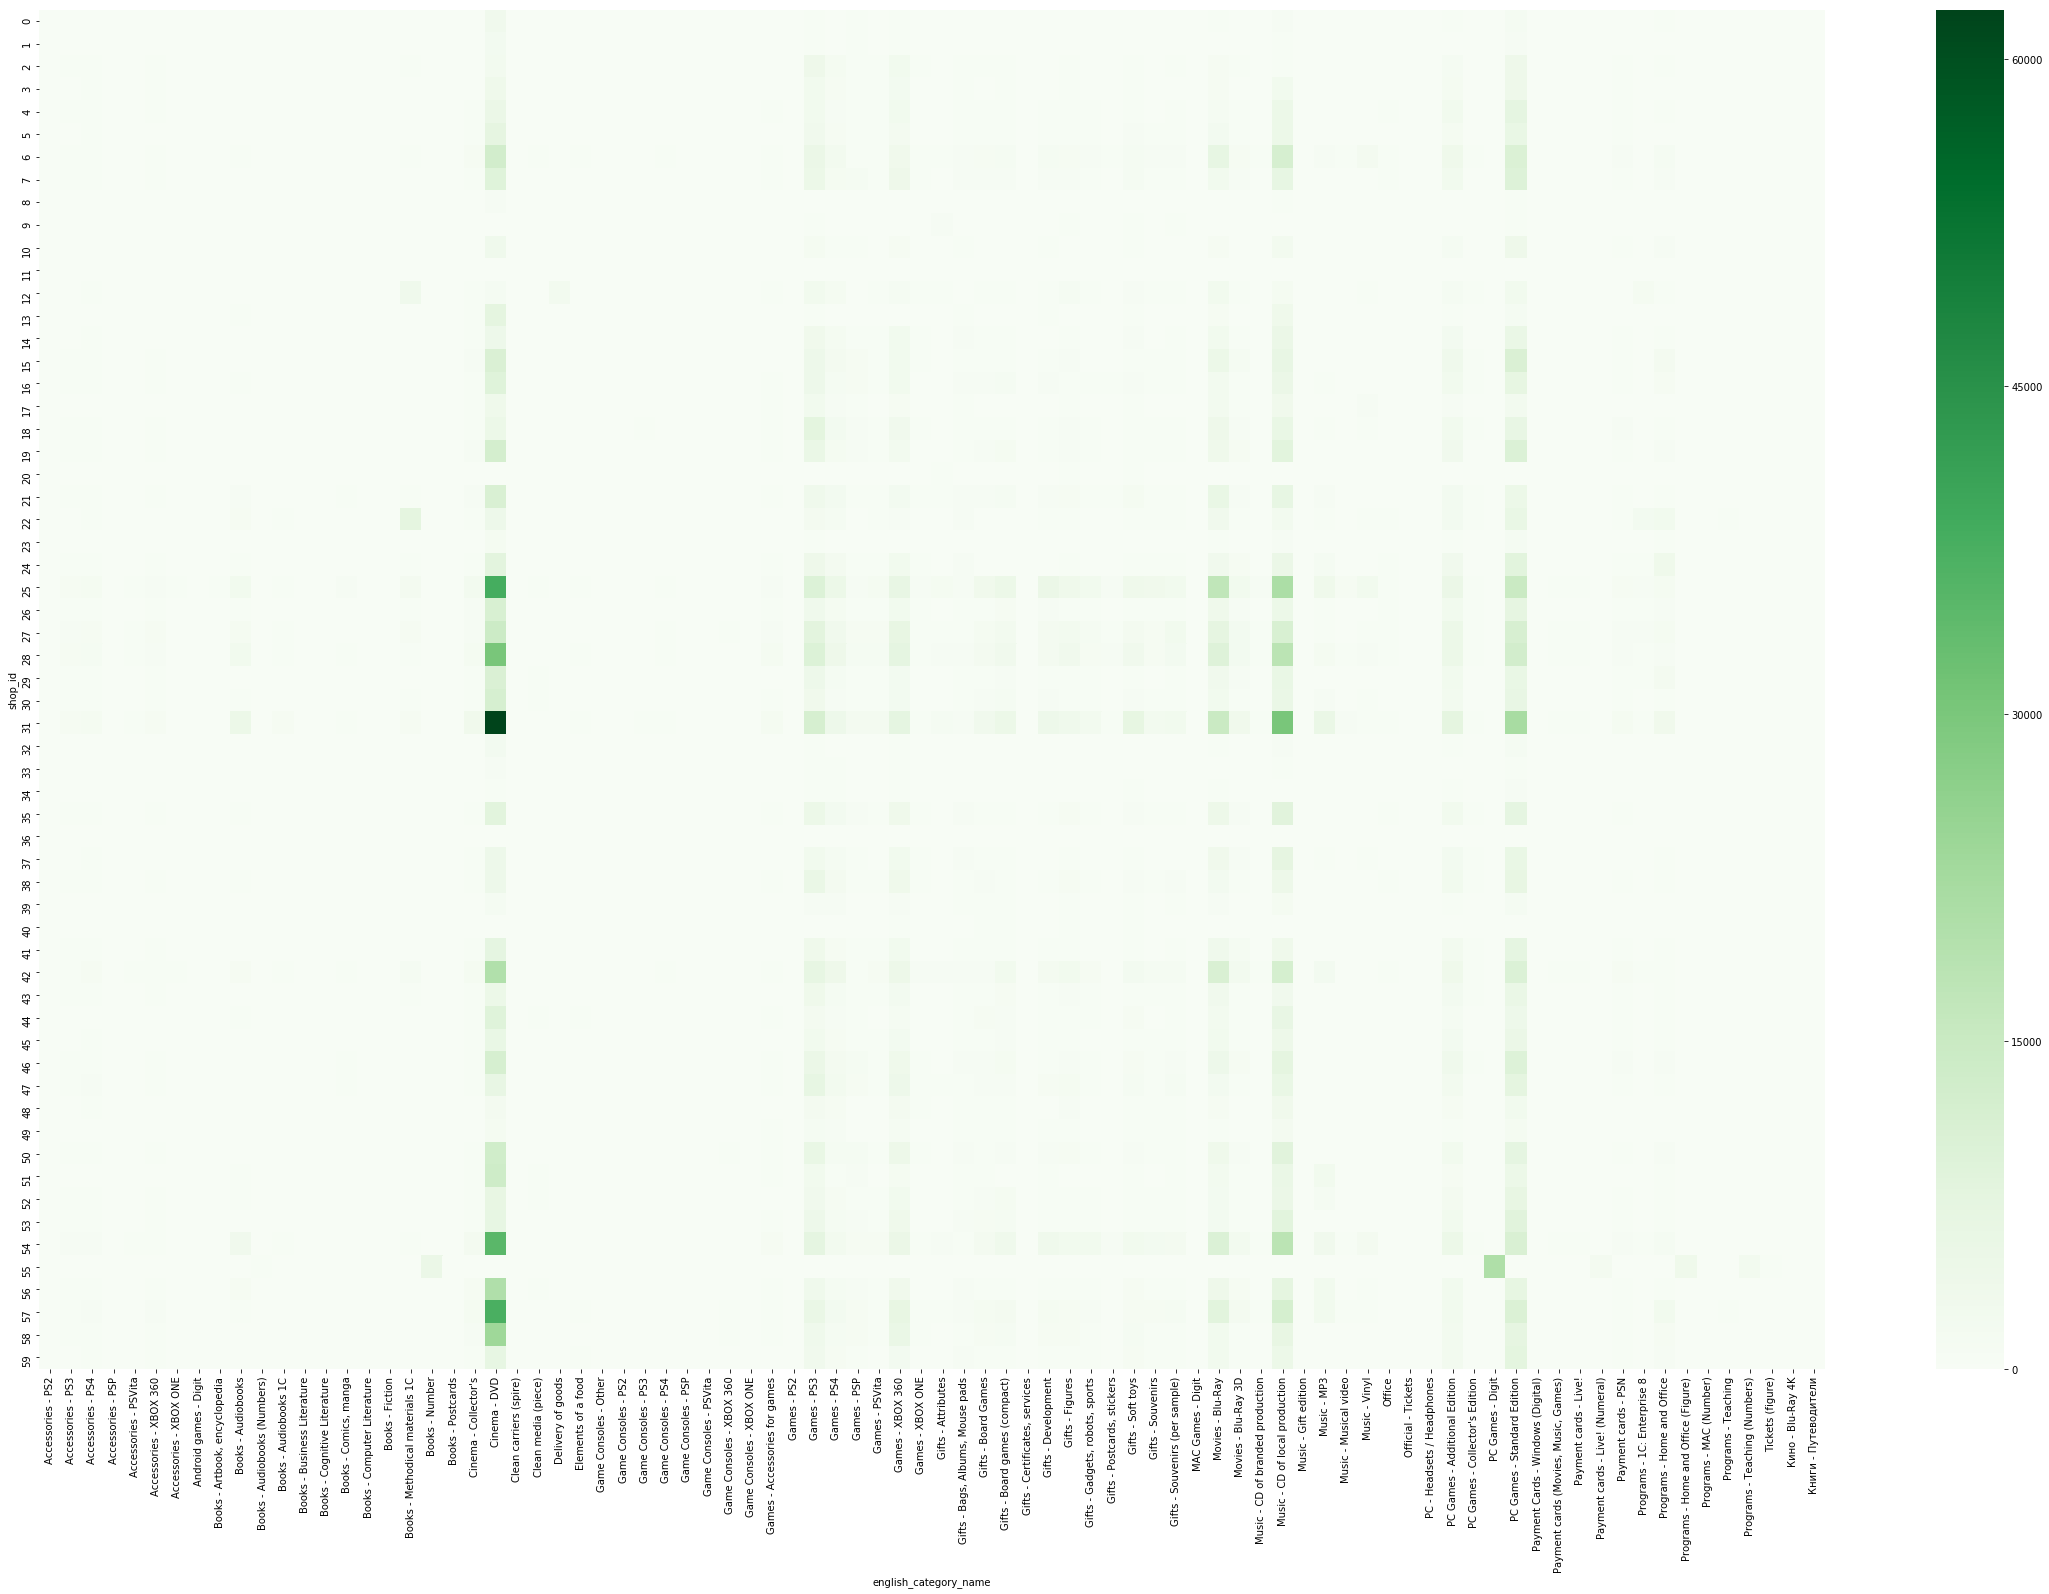

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

stores = sales_results.pivot_table(index='shop_id', columns='english_category_name', values='item_cnt_day', aggfunc='count', fill_value=0)
fig, ax = plt.subplots(figsize=(40,25))
sns.heatmap(stores, ax=ax, cbar=True, cmap="Greens")